In [12]:
import numpy as np
import wavecalc as wc
import matplotlib.pyplot as pl
import copy
from math import pi

In [14]:
wav = wc.wave()
surf = wc.surface()
med = wc.medium(epx=1.4**2,epy=1.9**2,epz=2.4**2)
med.rotate(45,'x') ; med.rotate(45,'y'); med.rotate(45,'z')
surf = med + surf
wav = wav + med
thetas = np.linspace(0,60,61)
Ang_a = []; Ang_b = []
for t in thetas:
    wav.rotate(t,'x')
    wav.fixmode()
    out = wav@surf
    out_a = out[0]; out_b = out[1]
    k_a = out_a.kvec; k_b = out_b.kvec
    ang_a = (180/pi)*np.arctan(k_a[1,0]/k_a[2,0])
    ang_b = (180/pi)*np.arctan(k_b[1,0]/k_b[2,0])
    Ang_a.append(ang_a); Ang_b.append(ang_b)
    wav.rotate(-t,'x')
Ang_a = np.asarray(Ang_a); Ang_b = np.asarray(Ang_b)

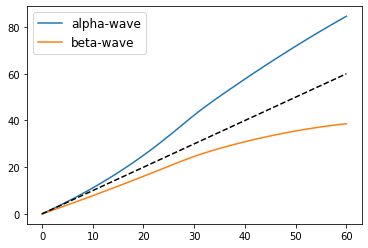

In [15]:
pl.plot(thetas,Ang_a,label='alpha-wave')
pl.plot(thetas,Ang_b,label='beta-wave')
pl.plot(thetas,thetas,'k--')

pl.legend(fontsize=12)
pl.show()

In [2]:
wav = wc.wave()
surf = wc.surface()

In [3]:
out = wc.crash(wav,surf)

C:\Users\Ryan\Anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [4]:
out[0].kvec

array([[ 0.+0.0000000e+00j],
       [ 0.+0.0000000e+00j],
       [-1.-1.3760081e-08j]])

In [5]:
out[0].clean(1e-7)
out[0].kvec

array([[ 0.],
       [ 0.],
       [-1.]])

In [9]:
med = wc.medium(ep_all = 2.25)
pris = wc.comp.prism(medium=med,wedge=90,axis='y')

In [10]:
pris.norm1

array([[0.70710678],
       [0.        ],
       [0.70710678]])

In [11]:
pris.norm2

array([[-0.70710678],
       [ 0.        ],
       [ 0.70710678]])